### Import required libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Load the dataset 

In [57]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing

In [58]:
# change column names 
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
# check missing values
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [60]:
# dropping the column which is not required for our analysis
df.drop(columns={"CustomerID","Gender"}, axis=1, inplace=True)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### EDA

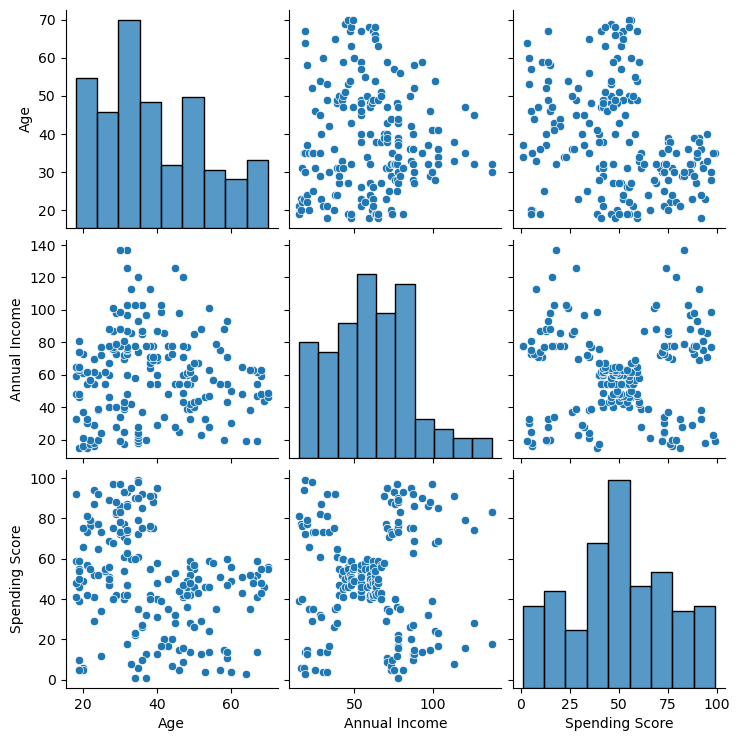

In [61]:
sns.pairplot(df)
plt.show()

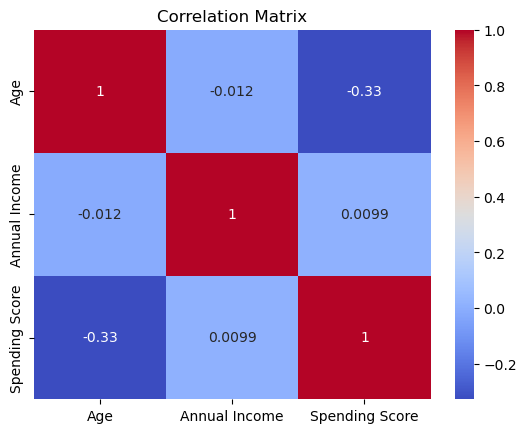

In [62]:
# display the correlation matrix
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)

### Train Heirarchial model

In [64]:
# train Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

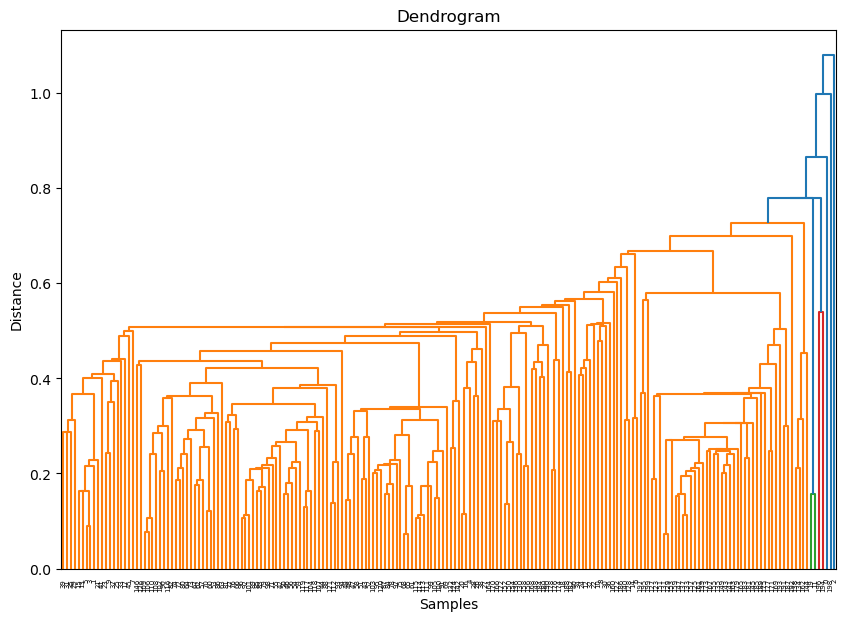

In [65]:
# create the dendrogram
linked = linkage(data,method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

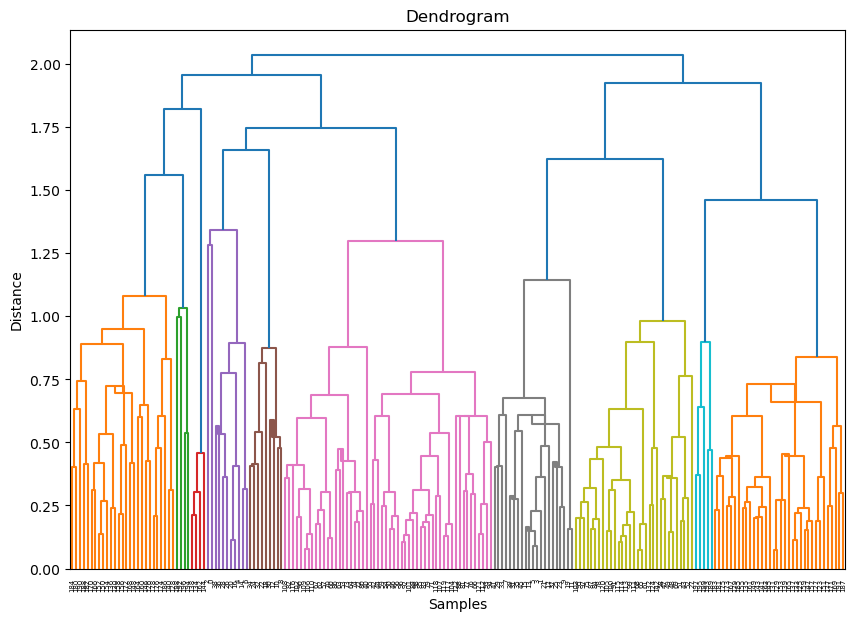

In [66]:
# create the dendrogram
linked = linkage(data,method='centroid')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

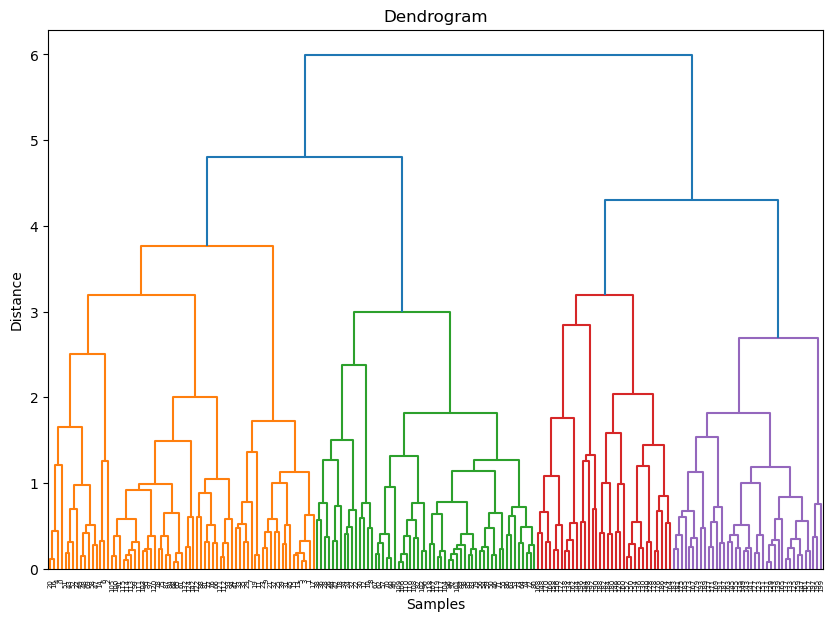

In [67]:
# create the dendrogram
linked = linkage(data,method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

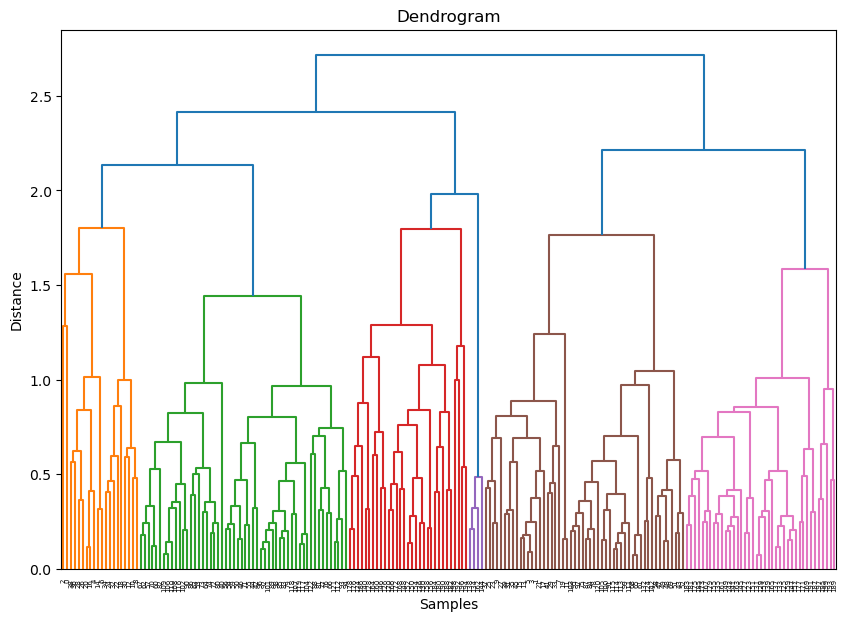

In [68]:
# create the dendrogram
linked = linkage(data,method='average')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending',
show_leaf_counts=True)
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [69]:
# train model
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
model.fit(data)
labels = model.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

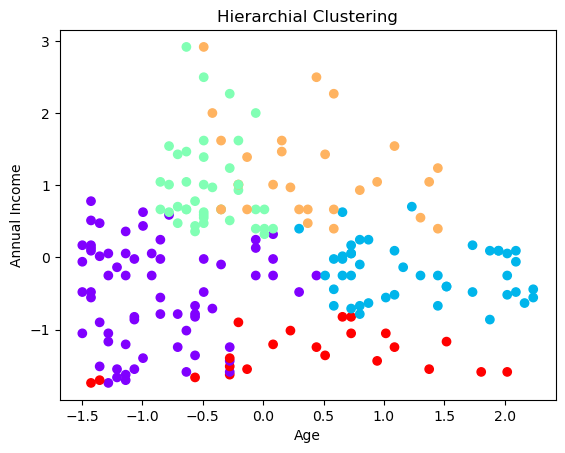

In [70]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')
plt.title("Hierarchial Clustering")
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [71]:
data = pd.DataFrame(data, columns=['Age', 'Annual-Income', 'Spending-Score'])
data.head()

,Age,Annual-Income,Spending-Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [72]:
# train model
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
model.fit(data)
data['labels'] = model.labels_
data

,Age,Annual-Income,Spending-Score,labels
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,3
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,3


In [78]:
# saved model
import joblib
joblib.dump(model,'hierarchial_model.pkl')

['hierarchial_model.pkl']

In [73]:
data.to_csv('Mall_Clustered_Customers.csv',index=False)

In [74]:
## Try supervised model
X = data.drop(columns=['labels'])
y = data['labels']

# splitting parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

### Plot Dendrogram with Threshold

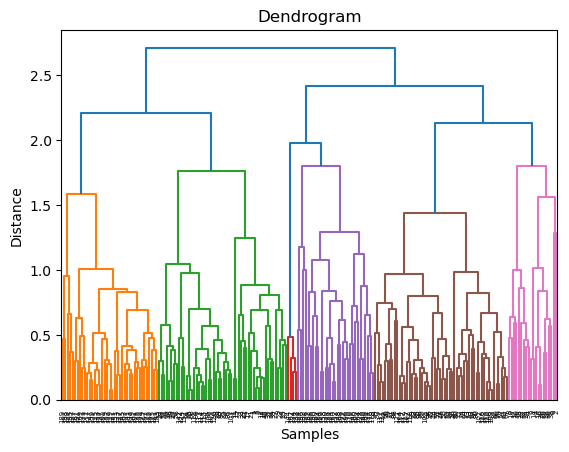

In [75]:
plt.Figure(figsize=(10, 5))
dendrogram(linked)
plt.axhline(y=150, color='r', linestyle='--')
plt.title('Dendrogram' )
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [76]:
# find the number of clusters using threshold
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, t=150, criterion='distance')
n_clusters = len(set(clusters))
print(f'Number of clusters: {n_clusters}')

Number of clusters: 1


In [77]:
# AGGLOMERATIVE CLUSTERING using Threshold

# Optimal threshold found from dendrogram (distance ~8 gives ~4-5 clusters)
threshold = 8
agglomerative_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative_clusters = agglomerative_model.fit_predict(data)

data['clusters'] = agglomerative_model.labels_